# COM4509/6509 - Lab 1: Probability

## Introduction to the Dataset

For this exercise we'll use the [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset): 253,680 Americans were called to ask about some of their health-related behaviours (eating fruit etc), and some health outcomes (have they diabetes, etc).

We first need to import various modules we'll use, download the dataset and open it, including [pandas](https://pandas.pydata.org), a data analysis and manipulation library, for looking at this data.

In [2]:
import pandas as pd   #useful for data access and manipulation
import urllib.request #used to download the dataset
import matplotlib.pyplot as plt #useful for plotting
#ensure our plots appear in the notebook:
%matplotlib inline
import numpy as np    #numpy is useful for matrix/array/tensor manipulation

Now download and open the dataset:

In [3]:
urllib.request.urlretrieve('https://drive.google.com/u/0/uc?id=1dprY31miDsQSZZwMkOfHoqkH4TQ8gV2W&export=download', './diabetes.csv')
df = pd.read_csv('diabetes.csv')

We can look at the content: It is a large table, containing 253680 rows (each row is a person) and 22 columns:

In [4]:
print("The columns in the dataset:")
print(df.columns)

The columns in the dataset:
Index(['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


The dataframe itself:

In [5]:
df

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,62.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,52.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,62.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,72.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,72.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,42.0,6.0,7.0
253676,253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,72.0,2.0,4.0
253677,253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,5.0,2.0
253678,253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,52.0,5.0,1.0


To get summary statistics about all these, use the .describe() method of the dataframe:

In [6]:
df.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,57.138127,5.050434,6.053875
std,73231.252481,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,15.323466,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,47.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,57.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,67.000000,6.000000,8.000000
max,253679.000000,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,82.000000,6.000000,8.000000


## Probabilities

We can estimate probabilities from this sample of the population.

Probabilities can be defined as the limit between the ratio of the number of positive outcomes (e.g. heads, if flipping a coin) and the number of trials:

$$P(Y = y) = \lim_{N \rightarrow \infty} \frac{n_y}{N}$$

If you only have a finite number of samples, we can assume that the ratio is still approximately correct for now:

$$P(Y = y) \approx \frac{n_y}{N}$$

### Using the dataset to find some probabilities

What is the probability a person in this dataset is under 50?

As with numpy arrays, we can do a boolean operation on all of them to get a boolean array of which items the condition is true for:

In [7]:
df['Age']<50

,Age
0,False
1,False
2,False
3,False
4,False
...,...
253675,True
253676,False
253677,True
253678,False


If we ask for the mean, it will give us the proportion that are true:

In [8]:
P_AgeLessThan50 = np.mean(df['Age']<50) #we can use the mean as the comparison returns a boolean with False being treated as a zero, and a True as a one.
print("%0.1f%% of people in the dataset are <50 years old" % (100*P_AgeLessThan50))

29.3% of people in the dataset are <50 years old


What is the probability a person in the dataset is under 50 AND regularly eats vegatables? (JOINT PROBABILITY)

In [9]:
P_AgeLessThan50andVeg = np.mean((df['Age']<50) & (df['Veggies']))
print("%0.1f%% of people in the dataset are <50 years old AND eat vegetables." % (100*P_AgeLessThan50andVeg))

23.9% of people in the dataset are <50 years old AND eat vegetables.


### Product Rule

What is the probability that they eat vegetables GIVEN they are under 50.

The product rule for probability we learnt was:

$$P(A,B) = P(A|B) P(B)$$

If we rearrange it we can find the conditional probability (please make sure you understand this step):

$$\frac{P(Veg=true, Age<50)}{P(Age<50)} = P(Veg=true\;|\;Age<50)$$

This is a conditional probability. Let's work it out:

In [10]:
#P(Veg|lt50) = P(Veg, lt50) / P(lt50)
print("Probability of eating vegetables GIVEN they are under 50: %0.1f%%" % (100*P_AgeLessThan50andVeg/P_AgeLessThan50))

Probability of eating vegetables GIVEN they are under 50: 81.8%


We can check this a different way, by picking out those who are under 50, and the looking at the proportion of those who eat vegetables:

In [11]:
dfAgeLessThan50 = df[df['Age']<50] #makes a new dataframe with just those under 50.

#of this dataframe, the proportion who eat veg:
print("Probability of eating vegetables GIVEN they are under 50: %0.1f%%" % (100*np.mean(dfAgeLessThan50['Veggies'])))

Probability of eating vegetables GIVEN they are under 50: 81.8%


### Exercise 1: Fruit, Vegetables and Indepence

We can get if someone eats fruit regularly using `df['Fruits']==1` and if they eat veg regularly using `df['Veggies']==1`. Compute:

- a. the probability of eating fruit regularly.
- b. the probability of eating vegetables regularly.
- c. the probability of eating both fruit AND vegetables regularly.
- d. does it seem like they are independent or not?

Tip:
> You might find the error "TypeError: unsupported operand type(s) for &: 'float' and 'float'" when trying to find the proportion of those who eat fruit AND veg, you are trying to do a boolean & on two floats, i.e. "1.0 & 1.0". The trick is either a typecast or do something like: `np.mean((df['Veggies']==1) & (df['Fruits']==1))`

---
Answer here.

---

In [12]:
# === Exercise 1：檢驗水果(Fruits) 與 蔬菜(Veggies) 是否獨立 ===
import numpy as np                         # 匯入 numpy，後續做邏輯運算或數值計算
import pandas as pd

# 假設二元欄位名稱為 'Fruits' 與 'Veggies'：1=有，0=沒有
# 若你的資料不是 0/1，可以先轉成 0/1：
df = df.dropna(subset=['Fruits', 'Veggies'])   # 丟掉這兩欄缺失值，避免後面計算出錯

df['Fruits'] = (df['Fruits'] > 0).astype(int)      # 大於 0 視為有，轉成 0/1

df['Veggies'] = (df['Veggies'] > 0).astype(int)

# 1) 直接用比例估計 P(A)、P(B)、P(A∩B)
P_A = df['Fruits'].mean()                          # P(A)=吃水果的比例
P_B = df['Veggies'].mean()                     # P(B)=吃蔬菜的比例
P_AB = ((df['Fruits']==1) & (df['Veggies']==1)).mean()  # P(A∩B)=同時吃水果與蔬菜的比例

print(f"P(A)={P_A:.3f}, P(B)={P_B:.3f}, P(A∩B)={P_AB:.3f}")
print(f"P(A)P(B)={P_A*P_B:.3f}")

# 判讀：獨立若 P(A∩B) ≈ P(A)P(B)
if abs(P_AB - P_A*P_B) < 1e-2:                    # 閾值 0.01 可依資料量調整
    print("以比例判斷：近似獨立")
else:
    print("以比例判斷：可能不獨立")

# 2) 用列聯表觀察分布
ct = pd.crosstab(df['Fruits'], df['Veggies'])   # 2x2 計數表
print("\n列聯表 (counts):\n", ct)
print("\n列聯表 (比例):\n", (ct/ct.to_numpy().sum()).round(3))

# 3) 用卡方獨立性檢定作正式統計檢定
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)     # 卡方統計量、p 值、自由度、獨立假設下期望次數
print(f"\nChi-square={chi2:.3f}, p-value={p:.5f}, dof={dof}")
print("期望次數表 (H0: 獨立):\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(2))

# p-value < 0.05 通常代表有證據拒絕獨立（視課程門檻而定）
if p < 0.05:
    print("統計結論：拒絕獨立假設（Fruits 與 Veggies 有關聯）")
else:
    print("統計結論：資料不足以拒絕獨立假設（看不出關聯）")

P(A)=0.634, P(B)=0.811, P(A∩B)=0.563
P(A)P(B)=0.515
以比例判斷：可能不獨立

列聯表 (counts):
 Veggies      0       1
Fruits                
0        29653   63129
1        18186  142712

列聯表 (比例):
 Veggies      0      1
Fruits               
0        0.117  0.249
1        0.072  0.563

Chi-square=16409.203, p-value=0.00000, dof=1
期望次數表 (H0: 獨立):
 Veggies         0          1
Fruits                      
0        17496.84   75285.16
1        30342.16  130555.84
統計結論：拒絕獨立假設（Fruits 與 Veggies 有關聯）


In [13]:
import numpy as np
import pandas as pd

# 假設 df 已在環境中；如果沒有，下面是小範例：
# df = pd.DataFrame({'Fruits': [1,0,1,1,0], 'Veggies': [1,1,0,1,0]})

# 只選需要的欄位並移除 NA
cols = ['Fruits', 'Veggies']
sub = df[cols].dropna()

# a. P(Fruits==1)
p_fruit = np.mean(sub['Fruits'] == 1)

# b. P(Veggies==1)
p_veg = np.mean(sub['Veggies'] == 1)

# c. 實際資料中 P(Fruit AND Veggies) -- 經驗值（用 AND）
p_both_empirical = np.mean((sub['Fruits'] == 1) & (sub['Veggies'] == 1))

# c (theoretical under independence): P(Fruit)*P(Veg)
p_both_product = p_fruit * p_veg

# 印出結果
print(f"P(fruit) = {p_fruit:.4f}")
print(f"P(veg)   = {p_veg:.4f}")
print(f"P(both) empirical = {p_both_empirical:.4f}   (由 AND 計算)")
print(f"P(fruit)*P(veg)  = {p_both_product:.4f}     (若獨立，理論值)")

# d. 用 np.isclose 比較（考慮浮點誤差）
if np.isclose(p_both_empirical, p_both_product, atol=1e-6):
    print("→ 經驗 P(both) 與 P(fruit)*P(veg) 非常接近：看起來可假設為獨立（數值上）")
else:
    print("→ 經驗 P(both) 與 P(fruit)*P(veg) 有差異：看起來不獨立")

# 額外：用卡方列聯表檢定更正式地檢驗獨立性（需 scipy）
try:
    from scipy.stats import chi2_contingency
    contingency = pd.crosstab(sub['Fruits'] == 1, sub['Veggies'] == 1)
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print("\nChi-square test:")
    print("chi2 =", chi2, "p-value =", p_value)
    if p_value < 0.05:
        print("→ 拒絕獨立（有顯著關聯）")
    else:
        print("→ 無法拒絕獨立（沒有顯著證據反對獨立）")
except Exception as e:
    print("\n（未執行卡方檢定，可能未安裝 scipy 或發生錯誤：）", e)

# 額外示範：如何建立一個與 Fruits 獨立但邊際機率相同的 Veggies_indep（模擬）
np.random.seed(0)
p_veg_margin = p_veg  # 保留原本 Veggies 的邊際機率
veg_indep = (np.random.rand(len(sub)) < p_veg_margin).astype(int)

p_both_with_indep = np.mean((sub['Fruits'] == 1) & (veg_indep == 1))
print("\n模擬一個獨立的 Veggies_indep：")
print(f"P(both) with Veggies_indep = {p_both_with_indep:.4f}  (應接近 P(fruit)*P(veg) = {p_both_product:.4f})")


P(fruit) = 0.6343
P(veg)   = 0.8114
P(both) empirical = 0.5626   (由 AND 計算)
P(fruit)*P(veg)  = 0.5146     (若獨立，理論值)
→ 經驗 P(both) 與 P(fruit)*P(veg) 有差異：看起來不獨立

Chi-square test:
chi2 = 16409.20349162928 p-value = 0.0
→ 拒絕獨立（有顯著關聯）

模擬一個獨立的 Veggies_indep：
P(both) with Veggies_indep = 0.5142  (應接近 P(fruit)*P(veg) = 0.5146)


In [14]:
# a. 'Fruits' 欄位的值為 1 代表吃水果
# 我們計算 'Fruits' == 1 的比例
p_fruit = np.mean(df['Fruits'] == 1)
print(f"the probability of eating fruit: {p_fruit:.4f}")

the probability of eating fruit: 0.6343


In [15]:
# b. 同樣地，'Veggies' == 1 代表吃蔬菜
p_veggies = np.mean(df['Veggies'] == 1)
print(f"the probability of eating vegetables regularly: {p_veggies:.4f}")

the probability of eating vegetables regularly: 0.8114


In [16]:
# c.不同事件 所以不能直接AND
# 須獨立計算後再相乘
# WRONG:
p_fruit_and_veggies = np.mean((df['Fruits']== 1)&(df['Veggies']== 1))

print(f"the probability of eating both fruit AND vegetables regularly:{p_fruit_and_veggies:.4f}")

the probability of eating both fruit AND vegetables regularly:0.5626


In [17]:
# d. does it seem like they are independent or not?
# 計算 P(Fruit) * P(Veggies)
p_fruit_times_p_veggies = p_fruit * p_veggies
print(f"P(Fruit) * P(Veggies) 的結果: {p_fruit_times_p_veggies:.4f}")
print(f"P(Fruit and Veggies) 的實際結果: {p_fruit_and_veggies:.4f}")

# 比較兩個值
if np.isclose(p_fruit_and_veggies, p_fruit_times_p_veggies, atol=0.01):
    print("\n結論：兩個值非常接近，所以這兩個事件看起來是獨立的。")
else:
    print("\n結論：兩個值差異較大，所以這兩個事件看起來不是獨立的。")
    print("這可能意味著，愛吃水果的人也傾向於愛吃蔬菜，反之亦然。")


P(Fruit) * P(Veggies) 的結果: 0.5146
P(Fruit and Veggies) 的實際結果: 0.5626

結論：兩個值差異較大，所以這兩個事件看起來不是獨立的。
這可能意味著，愛吃水果的人也傾向於愛吃蔬菜，反之亦然。


### Exercise 2: Diabetes

We can find the proportion of the participants that have diabetes.

The diabetes column is:

- 0 = no diabetes
- 1 = prediabetes
- 2 = diabetes

So we can write:

In [18]:
import numpy as np
P_diabetes = np.mean(df['Diabetes_012']==2)
print("Probability of diabetes (in this cohort): %0.1f%%" % (100*np.mean(P_diabetes)))

Probability of diabetes (in this cohort): 13.9%


- a. What proportion of those who eat fruit AND vegetables have diabetes?

---

In [19]:
#這是一個條件機率：P(糖尿病∣吃水果 and 吃蔬菜)。
#Answer here

# 步驟 1: 先篩選出子群體，並存成一個新的變數 df_healthy_eaters
df_healthy_eaters = df[(df['Fruits'] == 1) & (df['Veggies'] == 1)]

# 步驟 2: 再對這個新的、較小的子群體進行計算
p_diabetes_given_healthy_eaters = np.mean(df_healthy_eaters['Diabetes_012'] == 2)

#other write: p_diabetes_given_fruit_and_veggies=np.mean(df[(df['fruit']==1)&(df['veggies']==1)]['Diabetes_012']==2)
print(f"the proportion of those who eat fruit AND vegetables have diabetes: {p_diabetes_given_healthy_eaters*100:.1f}%")

the proportion of those who eat fruit AND vegetables have diabetes: 12.2%


---

- b. A smaller proportion of those who eat fruit and vegetables have diabetes, can we say from this that eating fruit and vegetables can reduce the risk of diabetes?

---

Answer here.

---
-No, other good habbits will also reduce the risk of diabetes, so we can't say just because they eat furit and veggieswill  reduce the risk.

### Exercise 3: Plotting

One of the columns is the BMI (body mass index) of the participants. Let's plot it in a histogram.

Text(0, 0.5, 'Frequency')

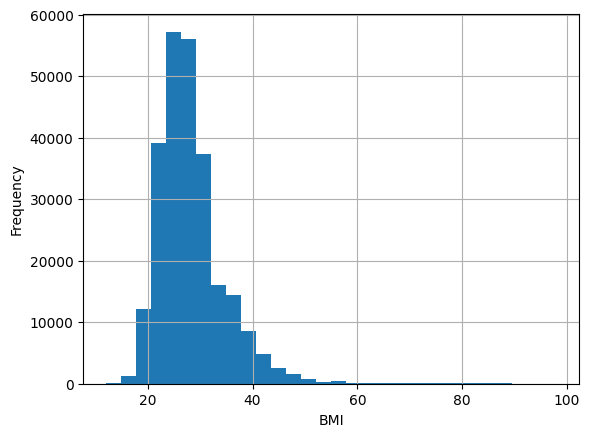

In [20]:
#it can be useful, for data that has both high counts and low, to switch to a log axis.
#we can do this with the hist method by adding the log=True parameter (Try turning it on / off)
plt.hist(df['BMI'],30)#,log=True);
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Frequency')

Exercise:
    
- a. The second parameter in the call to the `plt.hist` function selects the number of bins. Change it to 30 to get more detail.
- b. Is this a normal distribution? Why/why not?

Text(0, 0.5, 'Frequency')

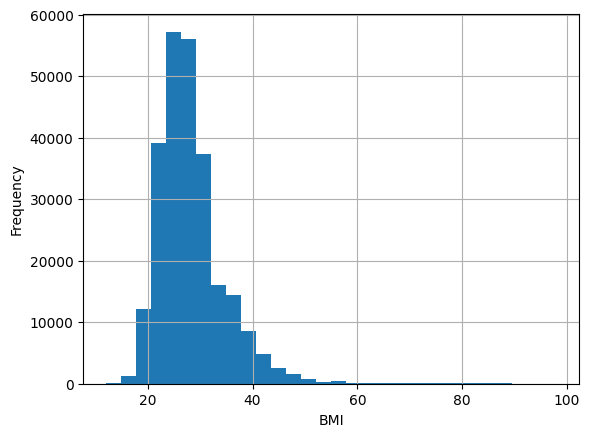

In [21]:
#a
#it can be useful, for data that has both high counts and low, to switch to a log axis.
#we can do this with the hist method by adding the log=True parameter (Try turning it on / off)
plt.hist(df['BMI'],30)#,log=True);
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Frequency')


[連結文字](https://)---

Answer to b here.

---

In [22]:
s = df["BMI"]
print(f"平均: {s.mean():.2f}")
print(f"中位數: {s.median():.2f}")
print(f"Skewness: {s.skew():.2f}")     # 0 對稱；>0 右偏
print(f"Kurtosis: {s.kurtosis():.2f}") # Fisher 定義：0 ≈ 常態

平均: 28.38
中位數: 27.00
Skewness: 2.12
Kurtosis: 11.00


Let's look at how BMI and income interact. The 'Income' column is *categorical* (with category 1 meaning less than \$10k/year; and category 8 means \$75k/year or more). Full details are in the ['codebook' for the dataset](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf).

So we create two numpy arrays `BMIofLowIncome` and `BMIofHighIncome` containing the BMI values for those two groups. We can then plot them as histograms too. I've plotted the density (as the two groups are different sizes, this makes it easier to compare). A density means the area under both histograms each sum to one.

Text(0.5, 0, 'BMI')

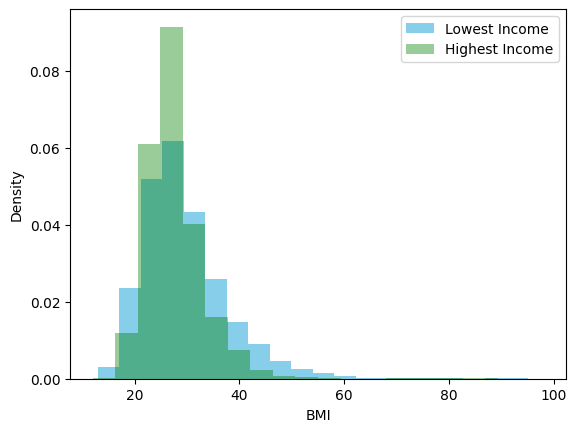

In [23]:
BMIofLowIncome = df[df['Income']==1]['BMI'].to_numpy()
BMIofHighIncome = df[df['Income']==8]['BMI'].to_numpy()
plt.hist(BMIofLowIncome,20,density=True,histtype='stepfilled',color='skyblue',ec="black",label="Lowest Income")
plt.hist(BMIofHighIncome,20,alpha=0.4,density=True,histtype='stepfilled',color='green',ec="black",label="Highest Income");
plt.legend()
plt.ylabel('Density')
plt.xlabel('BMI')

In [24]:
print("Mean BMI of high income and low income groups: %0.1f, %0.1f kg/m^2" % (np.mean(BMIofHighIncome),np.mean(BMIofLowIncome)))
print("%0.1f%% of people in the high income group are severely obese, while %0.1f%% of people in the low income group are." % (100*np.mean(BMIofHighIncome>40),100*np.mean(BMIofLowIncome>40)))

Mean BMI of high income and low income groups: 27.6, 29.7 kg/m^2
2.6% of people in the high income group are severely obese, while 8.9% of people in the low income group are.


Although the mean BMI is only slightly higher in the low income group, the increased variance means far more of those in the low income group have very high BMI values.

### Exercise 4: Expectations and Moments

We can compute the variance, using `np.var` of the two groups BMIs:

In [25]:
np.var(BMIofLowIncome)

np.float64(66.6496538943384)

In [26]:
np.var(BMIofHighIncome)

np.float64(34.86457316522133)

- a. Can you compute the variance without using the `np.var` or `np.mean` functions? Instead think about how we computed the appropriate expectations. You might find `np.sum(x)` useful (this sums over a list or array) and `len(x)` which will give you the length of an array or list, x.

---

In [27]:
#Answer here.
# μ（平均）= sum(x) / len(x)
# Variance(變異數) = sum( (x - μ)^2 ) / len(x)
x=df['BMI']
mu=np.sum(x)/len(x)
squared_deviations = (x-mu)**2
variation = np.sum(squared_deviations)/len(x)
print(variation)

43.67466688261127


- b. The next moment, after the mean and variance is the skewness of a distribution. It is computed by $$\tilde{\mu}_3 = E\Big[\Big(\frac{X-\mu}{\sigma}\Big)^3 \Big]$$
can you compute this?

---

In [28]:
#Answer here.
# Skewness = E[ ( (X - μ)/σ )^3 ]=(1/N) * Σ[ ( (x_i - μ)/σ )^3 ]，所以：
# 先算 μ = sum(x)/N（你現在會！）。
# 用 μ 算 var（你會的）。
# σ = sqrt(var)。先立方
# z = (x - μ)/σ。再除以sigma
# E[z^3] = sum(z**3)/N（這就是 skew）。

x = df['BMI']
mu = sum(x)/ len(x)
#算 var
squared_deviations = (x-mu)**2
var = np.sum(squared_deviations)/len(x)
# var = np.var(x)
sigma = np.sqrt(var)
z = (x - mu) / sigma
skew = np.sum(z**3) / len(x)
print(f"skewness: {skew:.4f}")


skewness: 2.1220


In [29]:

#Method 2 帶 np 的公式

x = df['BMI']
mu = np.sum(x) / len(x)
sigma = np.sqrt(np.var(x)) # Calculate standard deviation

# Calculate the cubed standardized deviations
cubed_standardized_deviations = ((x - mu) / sigma)**3

# Compute the mean of the cubed standardized deviations (skewness)
skewness = np.mean(cubed_standardized_deviations)

print(f"The skewness of the BMI distribution is: {skewness:.4f}")

The skewness of the BMI distribution is: 2.1220


---

# Naive Bayes

The health centre wants to do a blood test on those most at risk of developing diabetes. e.g. if the probability of having diabetes is more than 20\%.

A new patient arrives, who has a BMI of 40. What's the chance that they have diabetes?

$$P(Diabetes = true \; |\; BMI = 40)$$

Remember that the dataframe has a 'Diabetes_012' column (0=no diabetes, 1=pre-diabetic, 2=diabetic). So the proportion of the dataset who are diabetic is:

In [30]:
np.mean(df['Diabetes_012']==2)

np.float64(0.13933301797540207)

Note that the dataset is **not a representative sample**, so really we wouldn't necessarily want to use it for doing this sort of inference, but we'll continue, as an illustration!

For our patient we can just look at the proportion of those with BMI=40 who have diabetes:

In [31]:
#Here I create a temporary dataframe with those of a BMI of 40 using `df['BMI']==40]`.
#I then test each value of the Diabetes_012 column, and find the average number that have
#this equal to 2. This givens me the proportion.

dfBMI40 = df[df['BMI']==40] #make a new dataframe with just those with a BMI of 40.
np.mean(dfBMI40['Diabetes_012']==2) #find the proportion of this subset with diabetes

np.float64(0.32063773250664307)

So they fall into our 'high risk' category, as 32% of those with a BMI=40 in the dataset have diabetes.

In [32]:
#note that, due to the categorical nature of the age the ages are just at these
#discrete points:
np.unique(df['Age'])

array([21., 27., 32., 37., 42., 47., 52., 57., 62., 67., 72., 77., 82.])

## The curse of dimensionality

Supposing we also know they are in the age 21 category, and smoke...

We can again make a dataframe containing just those who:
- have a BMI = 40
- are in the age = 21 category
- and smoke,

In [33]:
#Here I create a temporary dataframe containing those who have a BMI of 40, are in the
#Age=21 category AND smoke, using `df[(df['BMI']==40) & (df['Age']==21) & (df['Smoker']==1)]`
dfBMI40Age21Smoke = df[(df['BMI']==40) & (df['Age']==21) & (df['Smoker']==1)]
np.mean(dfBMI40Age21Smoke['Diabetes_012']==2)

np.float64(0.0)

Great, 0% chance!!
But there's something a bit wrong about this analyis...

In [34]:
len(dfBMI40Age21Smoke)

6

There are only 6 people in the dataset with a BMI of 40, who are in the 21 years old category, who smoke.

We can display this whole set:

In [35]:
dfBMI40Age21Smoke

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
58186,58186,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,11.0,0.0,0.0,1.0,21.0,4.0,8.0
109921,109921,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,21.0,5.0,8.0
126529,126529,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,20.0,0.0,0.0,1.0,21.0,5.0,7.0
240700,240700,0.0,1.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,21.0,4.0,2.0
241084,241084,0.0,1.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,21.0,4.0,3.0
252523,252523,0.0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,0.0,0.0,21.0,5.0,2.0


### Naive Bayes

<mark>The Naive Bayes classifier is an approach for making this type of inference by assuming **conditional independence between the features** (given the class).</mark> We've already seen (with the fruit and veg above) that this assumption probably is invalid, but it can still give reasonable results.

Let's think about this more carefully:

We are interested in computing the probability of having diabetes (given some features about the person), i.e.:

$P(D=true | x_1, x_2,...,x_n)$.

Quoting from the [wikipedia article](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

> The problem with the above formulation is that if the number of features n is large or if a feature can take on a large number of values, then basing such a model on probability tables is infeasible.

We've seen this problem with the patient above. Only six rows (out of 253,680) in the database have the same features.

### Rewriting with Bayes Rule

We can write the above conditional distribution as:

$$P(D | x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n | D) \times P(D)}{P(x_1, x_2,...,x_n)}$$

We can use the chain rule of probability, to see that we can write the likelihood term as:

$$P(x_1, x_2,...,x_n | D) = P(x_1 | x_2,...,x_n, D) \times P(x_2 | x_3,...,x_n, D) \times \;... \times \; P(x_{n-1} \;|\; x_n, D)$$

It's not obvious to see why, so let's go through this step-by-step. We start with our likelihood term telling us the probability of having a BMI of 40, an age of 21 and smoking, given Diabetes = true (or false):

$$P(B=40, A=21, S = true | D)$$

We can write this using the product rule, as:

$$P(B=40 | A=21, S = true, D) \times P(A = 21, S = true | D)$$

We can then apply the same reasoning to the second term (try this yourself).

> It's probably worth stopping, writing this down on a bit of paper and thinking about it! This is quite a difficult step, and once you've understood it the rest will be fairly easy.
>
>  We are using:
> $$P(A,B) = P(A|B)\; P(B)$$
> but there's an additional conditional, 'given C' on everything:
> $$P(A,B|C) = P(A|B,C)\; P(B|C)$$

The result is that we can write our likelihood as a product of conditional probabilities:

$$P(B=40, A=21, S = true | D) \; \\= \\ P(B=40 | A=21, S = true, D) \;\;\times\;\; P(A=21 | S = true, D) \;\;\times\;\; P(S=true | D)$$


### The Naive-bit of Naive Bayes

> **Reminder: Condition independence.** If two random variables ($X,Y$) are conditionally independent, given a third ($Z$) it means that $P(X|Y,Z) = P(X|Z)$. I.e. (for a given value of Z) the probability of $X$ isn't influenced by the value of $Y$. It is written as $X \perp \!\!\! \perp Y | Z$.

Naive Bayes: We now make the (conditional) independence assumption in our expression above, that **all the features are conditionally independent (given the diabetes status, D)**.

So if our naive-Bayes assumption holds, we can write that:

$$P(B=40 \; | \; A=21, \; S = true, \; D) \; =\; P(B=40\; |\; D)$$

and,

$$P(A=21 | S = true, D) = P(A=21 | D)$$

Substituting in:

$$P(B=40, A=21, S = true | D) \; =\; P(B=40 | D) \; P(A=21 | D) \; P(S=true | D)$$

Please note that this, in general, isn't true. We are saying it's true because we have assumed conditional independence, e.g. that $B \perp \!\!\! \perp A | D$, etc.

### What are we assuming here?

When we assumed that we can approximate the probability with the ratio of cases to the total number in that condition, we were assuming that the total number was very large, so we were approximating infinite numbers of samples,

$$P(Y = y | Z) \approx \frac{n_{y|z}}{N_Z}$$

Six is not a large enough sample.

### Why is this useful?

The number of people in the dataset who had a BMI=40, were age=21, and smoked was only 6. But lots of individuals had *each* of these characteristics, so we can use these separately:

Note that Naive Bayes is often used to compute a ratio between two conditions, but here we'll compute the posterior.

$$P(D = true | x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n | D = true) P(D = true)}{P(x_1, x_2,...,x_n)}$$

To compute the demoninator we marginalise: I.e. we can compute $P(x_1, x_2,...,x_n,D=true)$ and $P(x_1, x_2,...,x_n,D=false)$ and add them up to get $P(x_1, x_2,...,x_n)$.

We've already computed the former when we computed the numerator, as it is the joint probability:

$$P(x_1, x_2,...,x_n, D = true) = P(x_1, x_2,...,x_n | D = true) P(D = true)$$

so we just need to compute,

$$P(x_1, x_2,...,x_n, D = false) = P(x_1, x_2,...,x_n | D = false) P(D = false).$$

Once we find these, we can add them up:

$$P(x_1, x_2,...,x_n) = P(x_1, x_2,...,x_n, D = true) + P(x_1, x_2,...,x_n, D = false)$$

### Putting it together...

Applying the Naive Bayes (conditional independence assumption) and substituting in our features (to keep it readable I've hidden the values the RVs are equal to). So we assume:

$P(B, A, S | D)\;\;\; =\; P(B | D)\;\;\; P(A | D) \;\;\; P(S | D)\\
P(B, A, S | \neg D)\; =\; P(B | \neg D)\; P(A | \neg D) \; P(S | \neg D)$

We can then use these to compute the denominator. Here we're using the above approximations to the likelihoods:

$$P(B,A,S) = P(B, A, S | D) P(D) + P(B, A, S| \neg D)P(\neg D)$$

and finally the posterior we're interested in: (remember that we are now going to be using our approximations, based on our assumptions about independence for these terms).

$$P(D | B, A, S) = \frac{P(B, A, S|D)\;P(D)}{P(B, A, S)}$$


In [36]:
#we create two dataframes, one of those with diabetes, and one with those without,
dfDiabetes = df[df['Diabetes_012']==2] # DataFrame containing only individuals with diabetes (Diabetes_012 == 2)
dfnotDiabetes = df[df['Diabetes_012']<2] # DataFrame containing individuals without diabetes or with prediabetes (Diabetes_012 < 2)

# Calculate the probability of having BMI=40 given diabetes (true or false)
PBMI40_givenDiabetesTrue = np.mean(dfDiabetes['BMI']==40) # P(BMI=40 | Diabetes=True)
PBMI40_givenDiabetesFalse = np.mean(dfnotDiabetes['BMI']==40) # P(BMI=40 | Diabetes=False)

# Calculate the probability of being Age=21 given diabetes (true or false)
PAge21_givenDiabetesTrue = np.mean(dfDiabetes['Age']==21) # P(Age=21 | Diabetes=True)
PAge21_givenDiabetesFalse = np.mean(dfnotDiabetes['Age']==21) # P(Age=21 | Diabetes=False)

# Calculate the probability of being a smoker given diabetes (true or false)
PSmoking_givenDiabetesTrue = np.mean(dfDiabetes['Smoker']==1) # P(Smoker=1 | Diabetes=True)
PSmoking_givenDiabetesFalse = np.mean(dfnotDiabetes['Smoker']==1) # P(Smoker=1 | Diabetes=False)

# Calculate the prior probability of having diabetes (true or false) in the entire dataset
PDiabetesTrue = np.mean(df['Diabetes_012']==2) # P(Diabetes=True)
PDiabetesFalse = np.mean(df['Diabetes_012']<2) # P(Diabetes=False)

In [37]:
#P(BMI=40,Age=21,Smoking=true | Diabetes=true)
PallGivenDiabetesTrue = (PBMI40_givenDiabetesTrue * PAge21_givenDiabetesTrue * PSmoking_givenDiabetesTrue * PDiabetesTrue)
#P(BMI=40,Age=21,Smoking=true | Diabetes=false)
PallGivenDiabetesFalse = (PBMI40_givenDiabetesFalse * PAge21_givenDiabetesFalse * PSmoking_givenDiabetesFalse * PDiabetesFalse)

print("Probaility of diabetes, given BMI=40, Age=21 and Smoker = %0.1f %%" % (100*(PallGivenDiabetesTrue) / (PallGivenDiabetesTrue + PallGivenDiabetesFalse)))

Probaility of diabetes, given BMI=40, Age=21 and Smoker = 4.6 %


### Exercise:

- a. What's the probability they have diabetes if they are 62, not a smoker and have a BMI of 20?
- b. What's the probability they are over 50 if they have a BMI of 20 and have diabetes and don't smoke? Use both Naive Bayes and compare to the answer computed with the full conditional distribution (without the independence assumption).

In [41]:
# Part a: P(Diabetes | Age=62, Smoker=False, BMI=20)

# 1. 準備資料：
# 為了方便計算 P(x | D=true) 和 P(x | D=false)，
# 我們分別建立 "有糖尿病" 和 "沒有糖尿病" 的子資料集
dfD = df[df['Diabetes_012']==2] # dfD: 只有 "有糖尿病" (Diabetes_012 == 2) 的人
dfnotD = df[df['Diabetes_012']==0] # dfnotD: 只有 "沒有糖尿病" (Diabetes_012 == 0) 的人

# 2. 計算所有必要的 "條件機率" (Likelihoods)
# 這些是 P(x_i | D)
# np.mean(布林值陣列) 是一個計算機率的技巧：
# 它會把 True 當作 1, False 當作 0 來取平均，
# 結果就等於 (True 的個數 / 總個數)，也就是機率。

# P(BMI=20 | 糖尿病=True)
PB20_givenDtrue = np.mean(dfD['BMI']==20)
# P(BMI=20 | 糖尿病=False)
PB20_givenDfalse = np.mean(dfnotD['BMI']==20)

# P(Age=62 | 糖尿病=True)
PA62_givenDtrue = np.mean(dfD['Age']==62)
# P(Age=62 | 糖尿病=False)
PA62_givenDfalse = np.mean(dfnotD['Age']==62)

# P(Smoker=False | 糖尿病=True) (假設 0 代表 False)
PnotS_givenDtrue = np.mean(dfD['Smoker']==0)
# P(Smoker=False | 糖尿病=False)
PnotS_givenDfalse = np.mean(dfnotD['Smoker']==0)

# 3. 計算 "先驗機率" (Priors)
# 這是 P(D)
PDtrue = np.mean(df['Diabetes_012']==2) # P(糖尿病=True) - 在 *所有* 資料中的比例
PDfalse = np.mean(df['Diabetes_012']==0) # P(糖尿病=False)

# 4. 根據 Naive Bayes 假設，計算分子的 "分數"
# 這就是 P(x | D) * P(D)
# 我們假設 P(B, A, S | D) = P(B | D) * P(A | D) * P(S | D)

# 分子 (True) = P(B=20|D) * P(A=62|D) * P(S=0|D) * P(D)
PallDtrue = PB20_givenDtrue * PA62_givenDtrue * PnotS_givenDtrue * PDtrue
# 分子 (False) = P(B=20|!D) * P(A=62|!D) * P(S=0|!D) * P(!D)
PallDfalse = PB20_givenDfalse * PA62_givenDfalse * PnotS_givenDfalse * PDfalse

# 5. 計算最終的後驗機率 P(D | x)
# P(D|x) = 分子(True) / (分子(True) + 分子(False))
# (分子(True) + 分子(False)) 就是你筆記中的 P(x)，也就是分母
print("[Naive Bayes] P(糖尿病 | BMI=20, 不吸菸, 年齡=62): = %0.1f %%" % (100*(PallDtrue) / (PallDtrue + PallDfalse)))

[Naive Bayes] P(糖尿病 | BMI=20, 不吸菸, 年齡=62): = 4.2 %


In [ ]:
# Part b (Naive Bayes): P(Age>50 | BMI=20, Smoker=False, Diabetes=True)

# 1. 翻轉問題！
# 我們的目標 (Y) 現在是 "年齡是否>50"
# 我們的特徵 (X) 現在是 (BMI, Smoker, Diabetes)

# 2. 計算新的 "條件機率" P(x_i | Y)
# Y=True 代表 Age>50, Y=False 代表 Age<=50

# P(BMI=20 | 年齡>50)
PB20_givenOtrue = np.mean(df[df['Age']>50]['BMI']==20)
# P(BMI=20 | 年齡<=50)
PB20_givenOfalse = np.mean(df[df['Age']<=50]['BMI']==20)

# P(Smoker=False | 年齡>50)
PnotS_givenOtrue = np.mean(df[df['Age']>50]['Smoker']==0)
# P(Smoker=False | 年齡<=50)
PnotS_givenOfalse = np.mean(df[df['Age']<=50]['Smoker']==0)

# P(Diabetes=True | 年齡>50)
PD_givenOtrue = np.mean(df[df['Age']>50]['Diabetes_012']==2)
# P(Diabetes=True | 年齡<=50)
PD_givenOfalse = np.mean(df[df['Age']<=50]['Diabetes_012']==2)

# 3. 計算新的 "先驗機率" P(Y)
POtrue = np.mean(df['Age']>50) # P(年齡>50)
POfalse = np.mean(df['Age']<=50) # P(年齡<=50)

# 4. 根據 Naive Bayes 假設，計算分子的 "分數"
# 分子 (True) = P(B|Y) * P(S|Y) * P(D|Y) * P(Y)
PallOtrue = (PB20_givenOtrue * PnotS_givenOtrue * PD_givenOtrue * POtrue)
# 分子 (False) = P(B|!Y) * P(S|!Y) * P(D|!Y) * P(!Y)
PallOfalse = (PB20_givenOfalse * PnotS_givenOfalse * PD_givenOfalse * POfalse)

# 5. 計算最終的後驗機率 P(Y | x)
print("[Naive Bayes] P(年齡>50 | BMI=20, 不吸菸, 糖尿病=True): = %0.1f %%" % (100*(PallOtrue) / (PallOtrue + PallOfalse)))

---

In [40]:
#Answers:
#Part a:
# Create dataframes for individuals with and without diabetes
dfD = df[df['Diabetes_012']==2] # Individuals with diabetes
dfnotD = df[df['Diabetes_012']==0] # Individuals without diabetes

# Calculate conditional probabilities for Naive Bayes (Part a)
# P(BMI=20 | Diabetes=True)
PB20_givenDtrue = np.mean(dfD['BMI']==20)
# P(BMI=20 | Diabetes=False)
PB20_givenDfalse = np.mean(dfnotD['BMI']==20)

# P(Age=62 | Diabetes=True)
PA62_givenDtrue = np.mean(dfD['Age']==62)
# P(Age=62 | Diabetes=False)
PA62_givenDfalse = np.mean(dfnotD['Age']==62)

# P(Smoker=False | Diabetes=True)
PnotS_givenDtrue = np.mean(dfD['Smoker']==0)
# P(Smoker=False | Diabetes=False)
PnotS_givenDfalse = np.mean(dfnotD['Smoker']==0)

# Calculate prior probabilities of diabetes
PDtrue = np.mean(df['Diabetes_012']==2) # P(Diabetes=True)
PDfalse = np.mean(df['Diabetes_012']==0) # P(Diabetes=False)

# Calculate the numerator for Naive Bayes (P(Features | Diabetes=True) * P(Diabetes=True))
PallDtrue = PB20_givenDtrue * PA62_givenDtrue * PnotS_givenDtrue * PDtrue
# Calculate the numerator for Naive Bayes (P(Features | Diabetes=False) * P(Diabetes=False))
PallDfalse = PB20_givenDfalse * PA62_givenDfalse * PnotS_givenDfalse * PDfalse

# Calculate the posterior probability P(Diabetes=True | Features) using Naive Bayes
print("[Naive Bayes] Probability of Diabetes, given BMI=20 and not Smoker, and Ages=52: = %0.1f %%" % (100*(PallDtrue) / (PallDtrue + PallDfalse)))

#Part b:
# Calculate conditional probabilities for Naive Bayes (Part b)
# P(BMI=20 | Age>50)
PB20_givenOtrue = np.mean(df[df['Age']>50]['BMI']==20)
# P(BMI=20 | Age<=50)
PB20_givenOfalse = np.mean(df[df['Age']<=50]['BMI']==20)

# P(Smoker=False | Age>50)
PnotS_givenOtrue = np.mean(df[df['Age']>50]['Smoker']==0)
# P(Smoker=False | Age<=50)
PnotS_givenOfalse = np.mean(df[df['Age']<=50]['Smoker']==0)

# P(Diabetes=True | Age>50)
PD_givenOtrue = np.mean(df[df['Age']>50]['Diabetes_012']==2)
# P(Diabetes=True | Age<=50)
PD_givenOfalse = np.mean(df[df['Age']<=50]['Diabetes_012']==2)

# Calculate prior probabilities of being over or under 50
POtrue = np.mean(df['Age']>50) # P(Age>50)
POfalse = np.mean(df['Age']<=50) # P(Age<=50)

# Calculate the numerator for Naive Bayes (P(Features | Age>50) * P(Age>50))
PallOtrue = (PB20_givenOtrue * PnotS_givenOtrue * PD_givenOtrue * POtrue)
# Calculate the numerator for Naive Bayes (P(Features | Age<=50) * P(Age<=50))
PallOfalse = (PB20_givenOfalse * PnotS_givenOfalse * PD_givenOfalse * POfalse)

# Calculate the posterior probability P(Age>50 | Features) using Naive Bayes
print("[Naive Bayes] Probability of over 50, given BMI=20 and not Smoker, and diabetes = %0.1f %%" % (100*(PallOtrue) / (PallOtrue + PallOfalse)))

#doing it with full joint distribution:
# Filter the DataFrame for individuals with Smoker=False, BMI=20, and Diabetes=True
df_filtered = df[(df['Smoker']==0) & (df['BMI']==20) & (df['Diabetes_012']==2)]
# Print the number of entries in the filtered dataframe
print("Number of entries: %d" % len(df_filtered))
# Calculate the proportion of the filtered group who are over 50
print("[Full]        Probability of over 50, given BMI=20 and not Smoker, and diabetes = %0.1f %%" % (100*np.mean(df_filtered['Age']>50)));

[Naive Bayes] Probability of Diabetes, given BMI=20 and not Smoker, and Ages=52: = 4.2 %
[Naive Bayes] Probability of over 50, given BMI=20 and not Smoker, and diabetes = 82.1 %
Number of entries: 115
[Full]        Probability of over 50, given BMI=20 and not Smoker, and diabetes = 92.2 %


---

### Related topics

- If you play with Naive Bayes you might find situations where no rows in the training set have that feature value. A simple approach to handling that is simply to 'add one' to all the frequencies. This is [Laplace Smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) (and is the equivalent to adding a prior).
- Naive Bayes can be considered as a (simple) Bayesian belief network:

<img width=300 src="https://www.researchgate.net/publication/283161090/figure/fig1/AS:648613512364033@1531652920537/A-typical-Naive-Bayes-network-diagram.png" />

<small><small>A Naive Bayes Network, from <i>Ibrahim et al. (2015). doi: 10.1016/j.procs.2015.09.194.</i></small></small>

A more complex network can be constructed, with some conditional dependencies added between features using edges. [Wikipedia article on Bayesian networks](https://en.wikipedia.org/wiki/Bayesian_network).

### Summary

With a handful of basic tools (the product rule, marginalisation, etc) we are able to perform really useful inference about important questions.

# Notes for other lecturers on data prep

The original ages were stored using a [14 category age](https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/AGEG5YR?archive=NAHDAP). So I converted these to years (using the centre of each category) and saved as a new file:

```
newdf = df[df['Age']!=99]
newdf['Age'] = newdf['Age']*5+17
newdf.loc[newdf['Age']==22,'Age']=21
newdf.to_csv('diabetes2.csv')
```